
Meilleurs hyperparamètres : {'classifier__class_weight': None, 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 50}

Score moyen en validation croisée : 0.7505

Précision sur l'ensemble de test : 0.7619

Matrice de confusion :
[[124  26]
 [ 29  52]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       150
           1       0.67      0.64      0.65        81

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.76      0.76      0.76       231



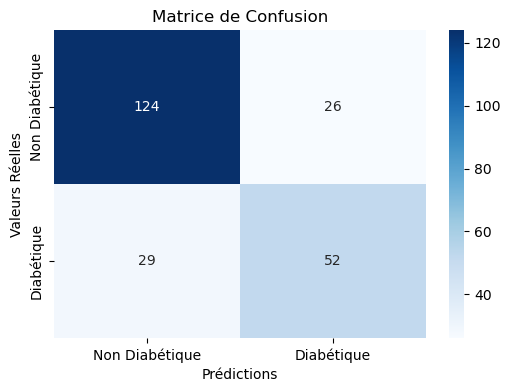

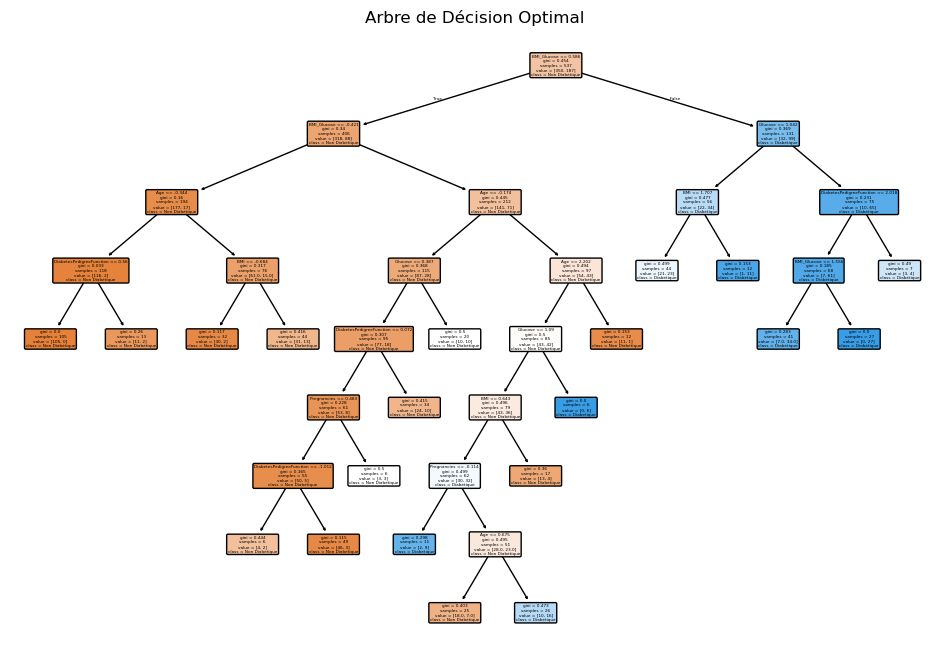


=========== Résumé Final ===========
Précision sur le test : 0.7619
Recall (classe 1 - Diabétique) : 0.6420
F1-score (classe 1 - Diabétique) : 0.6541


In [12]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données
# Assurez-vous que le fichier 'diabetes.csv' est dans le répertoire de travail
data = pd.read_csv('diabetes.csv')

# Création d'une nouvelle caractéristique : interaction entre BMI et Glucose
data['BMI_Glucose'] = data['BMI'] * data['Glucose']

# Séparation des variables explicatives (X) et de la variable cible (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Division des données en ensembles d'entraînement et de test avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Définition des étapes de prétraitement pour les variables numériques
numeric_features = X.columns.tolist()
preprocessing = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputation des valeurs manquantes par la moyenne
    ('scaler', StandardScaler())  # Standardisation des variables
])

# Construction du pipeline complet avec sélection de caractéristiques et classifieur
pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('feature_selection', SelectKBest(score_func=f_classif, k='all')),  # Sélection de toutes les caractéristiques
    ('classifier', DecisionTreeClassifier(random_state=42))  # Classifieur : Arbre de Décision
])

# Définition de la grille des hyperparamètres pour GridSearchCV
param_grid = {
    'classifier__max_depth': [10, 15, 20, None],
    'classifier__min_samples_split': [10, 20, 50],
    'classifier__min_samples_leaf': [5, 10, 20],
    'classifier__class_weight': ['balanced', None]  # Gestion du déséquilibre des classes
}

# Configuration de GridSearchCV avec validation croisée stratifiée
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5),  # 5-fold cross-validation stratifiée
    scoring='accuracy',
    n_jobs=-1  # Utilisation de tous les cœurs disponibles
)

# Entraînement du modèle sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Affichage des meilleurs hyperparamètres trouvés
print("\nMeilleurs hyperparamètres :", grid_search.best_params_)

# Affichage du score moyen de la validation croisée
cv_mean_score = grid_search.best_score_
print(f"\nScore moyen en validation croisée : {cv_mean_score:.4f}")

# Prédictions sur l'ensemble de test
y_pred = grid_search.predict(X_test)

# Évaluation des performances du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Affichage des résultats
print(f"\nPrécision sur l'ensemble de test : {accuracy:.4f}")
print("\nMatrice de confusion :")
print(conf_matrix)
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

# Visualisation de la matrice de confusion sous forme de heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non Diabétique', 'Diabétique'],
            yticklabels=['Non Diabétique', 'Diabétique'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.show()

# Visualisation de l'arbre de décision optimal
best_tree = grid_search.best_estimator_.named_steps['classifier']
features_selected = X.columns[grid_search.best_estimator_.named_steps['feature_selection'].get_support()]
plt.figure(figsize=(12, 8))
plot_tree(best_tree, filled=True, feature_names=features_selected,
          class_names=['Non Diabétique', 'Diabétique'], rounded=True)
plt.title('Arbre de Décision Optimal')
plt.show()

# Résumé final des performances
print("\n=========== Résumé Final ===========")
print(f"Précision sur le test : {accuracy:.4f}")
print(f"Recall (classe 1 - Diabétique) : {report['1']['recall']:.4f}")
print(f"F1-score (classe 1 - Diabétique) : {report['1']['f1-score']:.4f}")
print("====================================")


Développer un modèle de classification binaire capable de prédire si un patient est diabétique (Outcome = 1) ou non (Outcome = 0), à partir de caractéristiques médicales.

 Étapes réalisées
1. Importation des bibliothèques
Utilisation de pandas, numpy, scikit-learn, matplotlib, seaborn.

2. Chargement du jeu de données
Lecture du fichier diabetes.csv.

Aperçu des variables médicales comme Glucose, BMI, Age, etc.

3. Création d’une nouvelle caractéristique
BMI_Glucose = BMI × Glucose pour enrichir les données avec une interaction utile.

4. Séparation des données
Séparation en X (features) et y (label Outcome).

Division en ensembles d’entraînement et de test (30%) avec stratification pour équilibrer les classes.

5. Pipeline de prétraitement
Imputation des valeurs manquantes avec la moyenne (SimpleImputer).

Standardisation des données (StandardScaler).

Sélection de caractéristiques (SelectKBest avec ANOVA f-test).

6. Modélisation avec arbre de décision
Utilisation d’un DecisionTreeClassifier encapsulé dans un pipeline.

7. Optimisation par GridSearchCV
Recherche des meilleurs hyperparamètres :

max_depth, min_samples_split, min_samples_leaf, class_weight.

Utilisation d’une validation croisée stratifiée à 5 plis.

8. Évaluation des performances
Mesures calculées :

Précision (accuracy)

Matrice de confusion

Rapport de classification (précision, recall, F1-score par classe)

9. Visualisations
Matrice de confusion avec seaborn.heatmap.

Arbre de décision avec plot_tree, illustrant les décisions prises par le modèle.

10. Résumé final affiché
Score de test (accuracy)



1. Meilleurs hyperparamètres
classifier__class_weight: None
Cela indique que l'arbre de décision n'a pas utilisé de pondération pour les classes. Autrement dit, il a traité les classes 0 (Non Diabétique) et 1 (Diabétique) de manière équilibrée, sans donner plus d'importance à l'une ou l'autre.



classifier__max_depth: 10
La profondeur maximale de l'arbre a été limitée à 10. Cela permet d'éviter un surapprentissage (overfitting), en restreignant le nombre de décisions que l'arbre peut prendre avant de s'arrêter.



classifier__min_samples_leaf: 5
Cela signifie que chaque feuille de l'arbre doit avoir au moins 5 échantillons pour pouvoir être divisée davantage. Cette contrainte aide également à éviter le surapprentissage, en forçant les décisions à être basées sur des ensembles de données plus grands.



classifier__min_samples_split: 50
Pour qu'une division (split) soit effectuée dans l'arbre, il faut qu'au moins 50 échantillons soient présents dans le sous-ensemble. Cela aide à rendre l'arbre plus stable et moins sensible aux variations des petites sous-populations.



2. Score moyen en validation croisée
Score moyen (validation croisée): 0.7505
Cela signifie que la performance du modèle, mesurée en termes de précision, est en moyenne de 75.05% lors des 5 itérations de la validation croisée. Cela donne une idée générale de la capacité du modèle à généraliser, sans être influencé par une partition particulière des données.

3. Précision sur l'ensemble de test
Précision sur l'ensemble de test : 0.7619 (76.19%)
La précision représente la proportion de prédictions correctes parmi toutes les prédictions effectuées. Ici, le modèle a bien fonctionné sur l'ensemble de test, avec environ 76% des prédictions correctes.



4. Matrice de confusion

   [[124  26]  -> Classe réelle 0 (Non Diabétique)
   [ 29  52]]  -> Classe réelle 1 (Diabétique)

          Classe 0 (Non Diabétique) :

             124 vrais négatifs (TN) : Les cas où le modèle a correctement prédit "Non Diabétique".

             26 faux positifs (FP) : Les cas où le modèle a prédit "Diabétique" alors que la réalité était "Non Diabétique".

         Classe 1 (Diabétique) :

             29 faux négatifs (FN) : Les cas où le modèle a prédit "Non Diabétique" alors que la réalité était "Diabétique".

             52 vrais positifs (TP) : Les cas où le modèle a correctement prédit "Diabétique".

 5. Rapport de classification


 
Classe 0 (Non Diabétique)




Précision (precision) : 0.81
Parmi toutes les prédictions "Non Diabétique", 81% étaient correctes.



Rappel (recall) : 0.83
Parmi toutes les vraies instances "Non Diabétique", 83% ont été correctement identifiées par le modèle.



F1-score : 0.82
La moyenne harmonique entre la précision et le rappel, qui équilibre les deux mesures, est de 82%.



Classe 1 (Diabétique)




Précision (precision) : 0.67
Parmi toutes les prédictions "Diabétique", 67% étaient correctes.



Rappel (recall) : 0.64
Parmi toutes les vraies instances "Diabétique", 64% ont été correctement identifiées par le modèle.



F1-score : 0.65
Le F1-score pour la classe "Diabétique" est de 65%, ce qui montre un compromis entre précision et rappel.




Global

Précision globale : 0.76
La précision globale est de 76%, ce qui signifie que le modèle a correctement classé 76% des instances dans l'ensemble de test.


Macro-average (moyenne des scores par classe, sans pondération) :


Précision : 0.74


Rappel : 0.73

F1-score : 0.74

Cela donne une idée de la performance générale du modèle, sans prendre en compte la distribution des classes.


Weighted-average (moyenne pondérée en fonction de la taille des classes) :


Précision : 0.76


Rappel : 0.76

F1-score : 0.76

Cela reflète une performance plus équitable, car il prend en compte le nombre d'échantillons dans chaque classe.            

interprétation des résultats




Le modèle présente de bonnes performances globales avec une précision d'environ 76% et un rappel de 64% pour la classe "Diabétique", ce qui est relativement bon compte tenu de l'objectif de prédire une maladie.

Il y a cependant un déséquilibre dans le rappel entre les deux classes : le modèle est meilleur pour identifier les non-diabétiques (rappel = 83%) que pour identifier les diabétiques (rappel = 64%).

La précision pour la classe "Non Diabétique" est de 81%, mais elle est plus faible pour la classe "Diabétique" à 67%. Cela pourrait suggérer que le modèle a tendance à être plus prudent sur la prédiction des diabétiques.

Le F1-score de la classe "Diabétique" (0.65) indique que des améliorations sont possibles pour mieux identifier cette classe.

Propositions d'amélioration






Balancing les classes : Utiliser des techniques comme la sur-échantillonnage ou la sous-échantillonnage pour traiter l'imbalance des classes.

Modèles plus complexes : Tester d’autres modèles comme Random Forest ou Gradient Boosting qui peuvent mieux gérer les classes déséquilibrées.

Ajustement des hyperparamètres : Explorer davantage d'options de réglage comme l'augmentation de la profondeur de l'arbre ou l'utilisation de class_weight='balanced' pour le classifieur.